## Example H SAF NRT SSM products

In this Example we will read and plot images of the H SAF NRT products H08, H14 and H16 using the test images included in the ascat package.

In [1]:
import os
from datetime import datetime

import pytesmo.colormaps.load_cmap as smcolormaps
import ascat.h_saf as h_saf

test_data_path = os.path.join('..', 'tests','test-data', 'hsaf')

h08_path = os.path.join(test_data_path, 'h08')
h14_path = os.path.join(test_data_path, 'h14')
h16_path = os.path.join(test_data_path, 'h16')

h08_reader = h_saf.H08img(h08_path)
h14_reader = h_saf.H14img(h14_path)
h16_reader = h_saf.H16img(h16_path, month_path_str='')

### Reading H08 product

H08 data has a much higher resolution and comes on a 0.00416 degree grid.

The sample data included in the ascat package was observed on the same time as
the included H16 product.

Instead of read you can also use the daily_images iterator.

You just specify a day and it will read all the images that are in your folder for this day. 
 
This also works for the H16, H101, H102, H103 and H14 reader.

In [2]:
for h08_data, metadata, timestamp, lons, lats, time_var in h08_reader.daily_images(datetime(2010, 5, 1)):

    # this tells you the exact timestamp of the read image
    print(timestamp.isoformat())
    print(type(h08_data))
    
    # the data is a dictionary, each dictionary key contains the array of one variable
    print("The following variables are in this image", h08_data.keys())
    print(h08_data['ssm'].shape)
    print(lons.shape)
    print(lats.shape)

2010-05-01T08:33:01
<type 'dict'>
('The following variables are in this image', ['ssm', 'proc_flag', 'ssm_noise', 'corr_flag'])
(3120, 7680)
(3120, 7680)
(3120, 7680)


In our case only one image is in the folder so the loop exits after this image is read.

The data has higher resolution but it already comes as a 2D image.

Let's plot it.

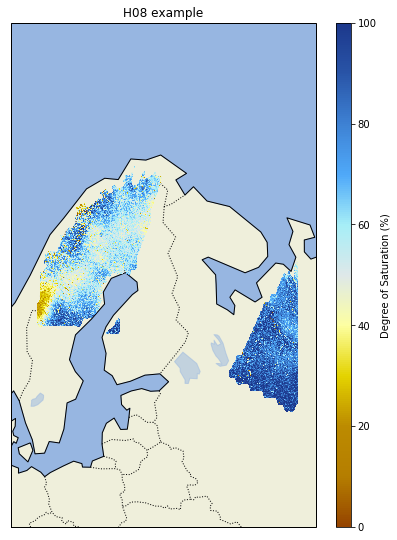

In [3]:
import numpy as np
import cartopy
import matplotlib.pyplot as plt

plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(8, 10))
ax = fig.add_axes([0.05, 0.2, 0.6, 0.7], projection=plot_crs)

ax.set_title('H08 example')
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([10, 47, 50, 75])

data = np.ma.masked_greater(np.flipud(h08_data['ssm']), 100)
sc = ax.pcolormesh(lons, np.flipud(lats), data, zorder=3, 
                   transform=data_crs, cmap=smcolormaps.load('SWI_ASCAT'),
                  vmin=0, vmax=100)

cax = fig.add_axes([0.65, 0.2, 0.025, 0.7])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label('Degree of Saturation (%)')
plt.show()

#### Reading a Region Of Interest (ROI) of H08

H08 has a very high resolution and users might want to read only data for their area of interest. This can be done using the lat_lon_bbox keyword

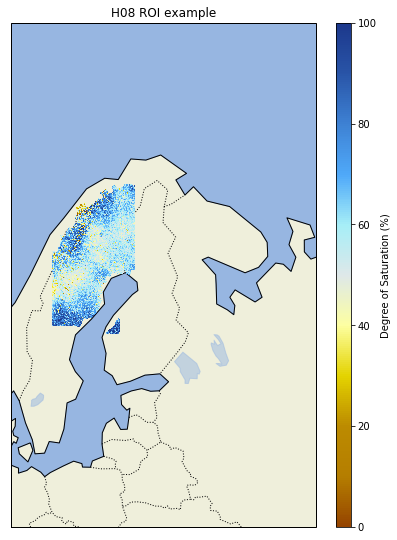

In [4]:
# the reader returns not only the data but also metadata and the longitudes and latitudes
h08_roi, metadata, timestamp, lons, lats, time_var = \
    h08_reader.read(datetime(2010, 5, 1, 8, 33, 1), lat_lon_bbox=[60, 70, 15, 25])

plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(8, 10))
ax = fig.add_axes([0.05, 0.2, 0.6, 0.7], projection=plot_crs)
# initialize the readers with the path
ax.set_title('H08 ROI example')
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([10, 47, 50, 75])

data = np.ma.masked_greater(np.flipud(h08_roi['ssm']), 100)
sc = ax.pcolormesh(lons, np.flipud(lats), data, zorder=3, 
                   transform=data_crs, cmap=smcolormaps.load('SWI_ASCAT'), 
                   vmin=0, vmax=100)

cax = fig.add_axes([0.65, 0.2, 0.025, 0.7])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label('Degree of Saturation (%)')
plt.show()

### Reading H14 product

The H14 product is a global product on a reduced gaussian grid with a resolution of approx. 25km.

In [5]:
# the reader returns not only the data but also metadata and the longitudes and latitudes
h14_data, metadata, timestamp, lons, lats, time_var = h14_reader.read(datetime(2014, 5, 15))

print(type(h14_data))

# the data is a dictionary, each dictionary key contains the array of one variable
print("The following variables are in this image", h14_data.keys())
print(h14_data['SM_layer1_0-7cm'].shape)
print(lons.shape)
print(lats.shape)

<type 'dict'>
('The following variables are in this image', ['SM_layer1_0-7cm', 'SM_layer2_7-28cm', 'SM_layer3_28-100cm', 'SM_layer4_100-289cm'])
(800, 1600)
(800, 1600)
(800, 1600)


The data comes as a 2D array. If the keyword expand_grid is set to False during reader initialization then only 1D arrays would be returned. 

This can be good for working with the data but for plotting the expanded grid is easier to handle.

Let's plot all layers in the H14 product

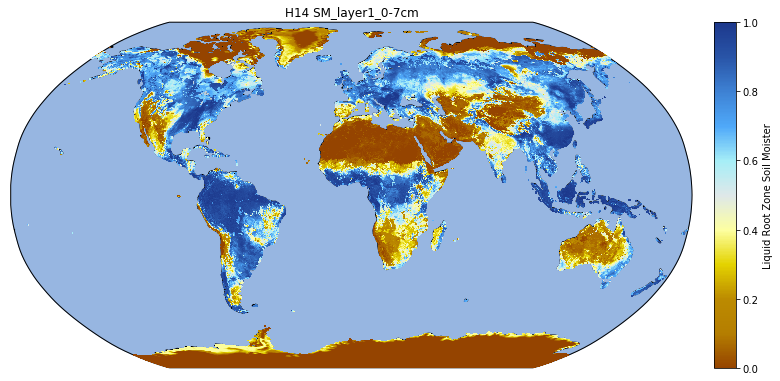

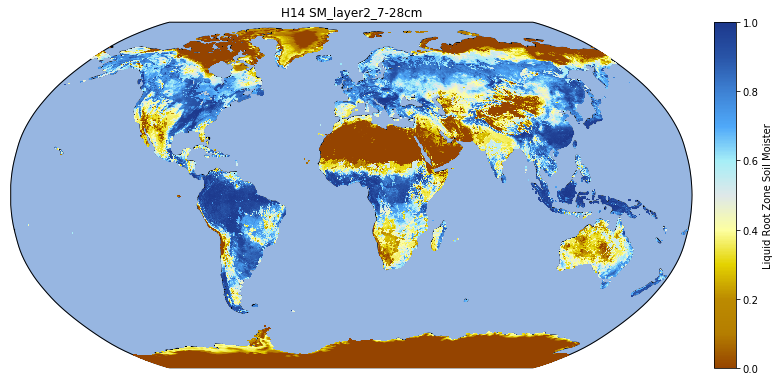

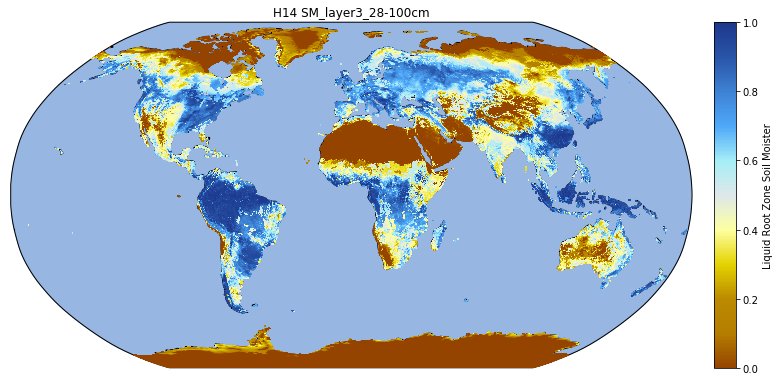

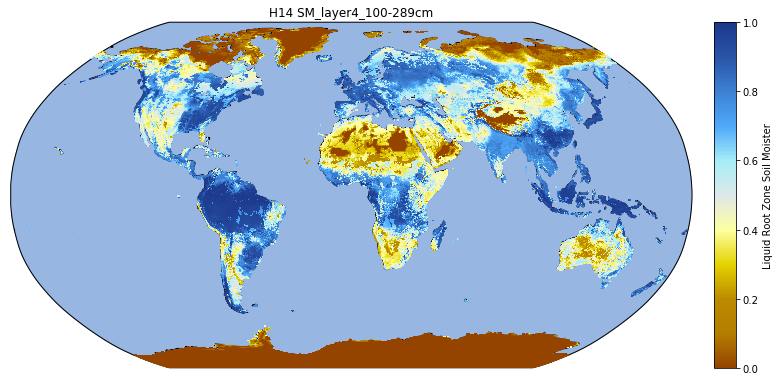

In [6]:
plot_crs = cartopy.crs.Robinson()
data_crs = cartopy.crs.PlateCarree()

for layer in h14_data:
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
    ax.set_title('H14 {:}'.format(layer))
    
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)

    sc = ax.pcolormesh(lons, lats, h14_data[layer], zorder=3, 
                       transform=data_crs, cmap=smcolormaps.load('SWI_ASCAT'))

    cax = fig.add_axes([0.92, 0.1, 0.025, 0.8])
    cbar = fig.colorbar(sc, cax=cax)
    cbar.set_label('Liquid Root Zone Soil Moister')
    plt.show()

### Reading H16 product

The products H16, H101, H102, H103 come in the same BUFR format. Since the default filenames are slightly different the following readers should be used:

* H16 - ascat.h_saf.H16img
* H101 - ascat.h_saf.H101img
* H102 - ascat.h_saf.H102img
* H103 - ascat.h_saf.H103img
* H07 - ascat.h_saf.H07img - discontinued product

Otherwise the format and API is identical.

The ascat repository includes one H16 file with the timestamp 2017-02-20 11:00:00. We can either read this file alone if we know the exact timestamp or iterate over all images on 2017-02-20.

In [7]:
# the reader returns not only the data but also metadata, longitudes and latitudes
h16_data, metadata, timestamp, lons, lats, time_var = h16_reader.read(datetime(2017, 2, 20, 11, 15, 0))

print(type(h16_data))

# the data is a dictionary, each dictionary key contains the array of one variable
print("The following variables are in this image", h16_data.keys())
print h16_data['Surface Soil Moisture (Ms)'].shape

# it is only a 1D array to plot the data we also need latitude and logitude information
print(lons.shape)
print(lats.shape)

<type 'dict'>
('The following variables are in this image', ['Estimated Error In Sigma0 At 40 Deg Incidence Angle', 'Slope At 40 Deg Incidence Angle', 'Topographic Complexity', 'Surface Soil Moisture (Ms)', 'Inundation And Wetland Fraction', 'Wet Backscatter', 'Snow Cover', 'Rain Fall Detection', 'Frozen Land Surface Fraction', 'Mean Surface Soil Moisture', 'Estimated Error In Slope At 40 Deg Incidence Angle', 'Soil Moisture Sensitivity', 'Soil Moisture Processing Flag', 'jd', 'Dry Backscatter', 'Soil Moisture Correction Flag', 'Soil Moisture Quality', 'Orbit Number', 'Estimated Error In Surface Soil Moisture', 'Backscatter', 'Direction Of Motion Of Moving Observing Platform'])
(637,)
(637,)
(637,)


Plot the SSM data as individual points

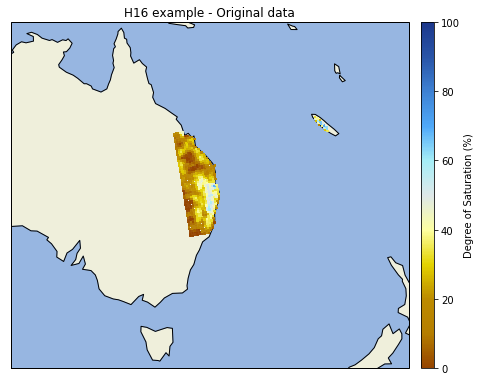

In [8]:
plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('H16 example - Original data')
   
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([130, 175, -10, -42])

data = h16_data['Surface Soil Moisture (Ms)']

sc = ax.scatter(lons, lats, c=data, zorder=3, marker='s', s=2,
                transform=data_crs, cmap=smcolormaps.load('SWI_ASCAT'),
                vmin=0, vmax=100)

cax = fig.add_axes([0.92, 0.1, 0.025, 0.8])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label('Degree of Saturation (%)')
plt.show()

Or resample orbit geometry to a regular 0.1 deg x 0.1 deg grid for plotting

/home/shahn/.pyenv/versions/miniconda2-latest/envs/test-environment/lib/python2.7/site-packages/pytesmo/grid/resample.py:270: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  output_array[~mask] = data


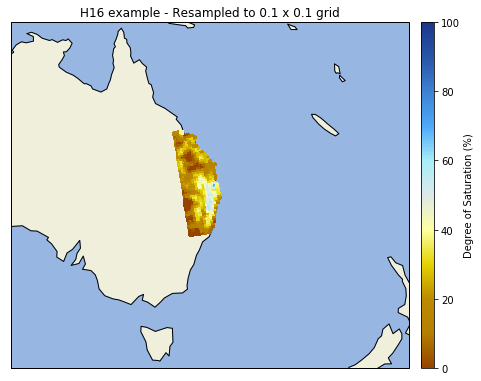

In [9]:
import pytesmo.grid.resample as resample

# lets resample to a 0.1 degree grid
# define the grid points in latitude and logitude
lats_dim = np.arange(-80, 80, 0.1)
lons_dim = np.arange(-160, 160, 0.1)

# make 2d grid out the 1D grid spacings
lons_grid, lats_grid = np.meshgrid(lons_dim, lats_dim)
    
resampled_data = resample.resample_to_grid(h16_data, lons, lats, 
                                           lons_grid, lats_grid)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title('H16 example - Resampled to 0.1 x 0.1 grid')
   
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([130, 175, -10, -42])

data = resampled_data['Surface Soil Moisture (Ms)']
sc = ax.pcolormesh(lons_grid, lats_grid, data, zorder=3, 
                   cmap=smcolormaps.load('SWI_ASCAT'),
                   vmin=0, vmax=100, transform=data_crs)

cax = fig.add_axes([0.92, 0.1, 0.025, 0.8])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label('Degree of Saturation (%)')
plt.show()